In [12]:
# TEMPORARY -- Install this if you get an error in 1.2. Let me know if it errors and I'll find a work around without it.

In [13]:
# pip install ipywidgets

# Model Building [student]

In this notebook, you will work with timeseries data, starting with no other context. Your goal is use the raw data to build up to a robust model. We ask that you complete the content of this notebook linearly for the best learning experience.

### Loading the data

In [69]:
# Just run this cell. 
import numpy as np
# plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.optimize import curve_fit
from ipywidgets import interact, FloatSlider

from hidden import *

Let's start by loading the dataframe, which has been cleared of any contextual details. Feel free to experiment with timeseries_data however, but for now, no other information will be given.

In [51]:
timeseries_data = get_data()

In [52]:
timeseries_data

,time,value
0,0,61889.0
1,7,61273.0
2,14,58754.0
3,21,57407.0
4,28,57474.0
...,...,...
255,1785,55598.0
256,1792,57418.0
257,1799,57778.0
258,1806,57579.0


For easier access later, let's store the first column values in `xdata` and second column values in `y_data`.

In [53]:
xdata = np.array(timeseries_data['time'])
ydata = np.array(timeseries_data['value'])

## Part 1: Model Building

In this section of the notebook, we will visualize, analyze and fit our data to a model and investigate whether our model is good. To begin, let's plot our timeseries data. 


Text(0, 0.5, 'value')

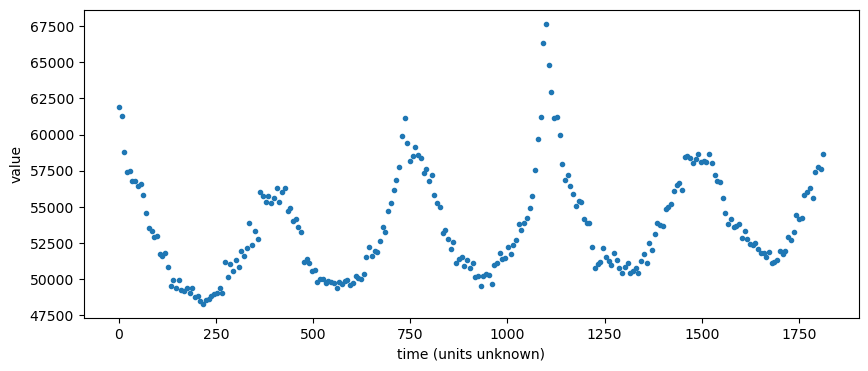

In [54]:
plt.figure(figsize=(10, 4)) 
plt.plot(xdata, ydata, '.')
plt.xlabel('time (units unknown)') 
plt.ylabel('value')

_Use this space to note any initial observations you have about the data._

### 1.1 A Simple Model

**Question 1.1.1**: If you had to explain what value you'd expect at any given time, how could you do it? Think about how this representation helps us understand the dataset's general behavior or trend without getting lost in the specifics of each data point.

_Your answer here_

We will create a constant model, that asssumes, despite the ups and downs in the data, there's an average value that represents the entire dataset reasonably well over time. 

Average value is 53625.11923076923


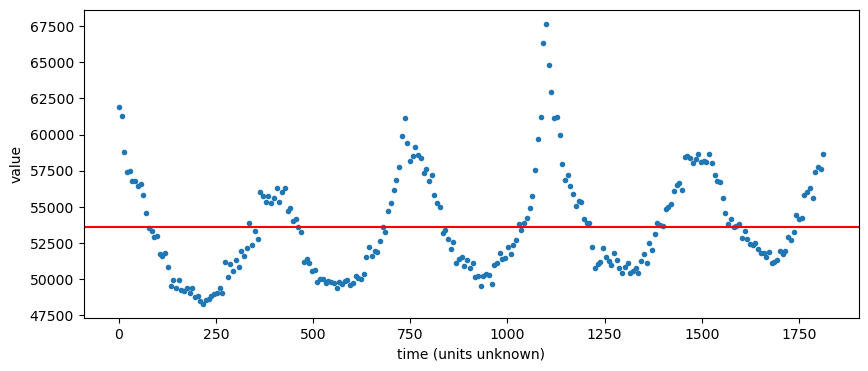

In [55]:
#Just run this cell.
average_value = np.mean(ydata)
print("Average value is " + str(average_value))

plt.figure(figsize=(10, 4))
plt.plot(xdata, ydata, '.')
plt.axhline(y=average_value, color='r', linestyle='-') 
plt.xlabel('time (units unknown)')
plt.ylabel('value')
plt.show()

**Question 1.1.2:** In this model, how would you define the the signal? 

_Replace this with your answer._

We can now summarize the entire dataset with a single number, giving us a baseline to compare patterns, observe deviations from the norm, and consider more parameters to build more complex models.


### 1.2 Adding More Parameters

**Question 1.2.1**: Based on the model you built above, describe what patterns and trends you notice? What mathematical function do you know that best mimics the pattern applied to the data above?

_Replace this with your answer._

One function we can use is the cosine function, a good choice when working with data that looks periodical (i.e. occurs in phases).

$$
f(x) = A \cos(B(x - C)) + D
$$

Providing initial guesses for more complex models can help guide the computational process towards a more accurate and efficient solution. Use the widget below to experiment with what you can use as your intial guesses for the parameters A, B, C, and D. Don't worry about fitting the perfect model, a rough start is to get started will be good enough for our optimizing function later!

In [56]:
#Just run this cell.
cosine_widget()

interactive(children=(FloatSlider(value=0.0, description='A', max=10000.0, readout_format='.0f', step=1.0), Fl…

**Question 1.2.2**: Assign the values you choose for A, B, C, and D to `guess`, in that order, as a list. 

In [57]:
guess = [4000, 0.02, 20, 54000] 

Using the values for A, B, C, and D above as our guesses, let's find the best parameters that minimize error. This may be unfamiliar, but we will leverage `curve_fit` function from the scipy.optimize library which finds the best fit model (given we provide good starting point), doing most of the heavylifting for us. You can read the documentation here for [curve fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) if you're curious.

**Question 1.2.3**: Fill in the code for `cos_func` which the specific shape of our curve given some paramters. Then, use that to define `fit_cosine`, which is the model that will be plotted over the data.

_Hint: You'll know your guesses were good if the model is nicely fit to the data._

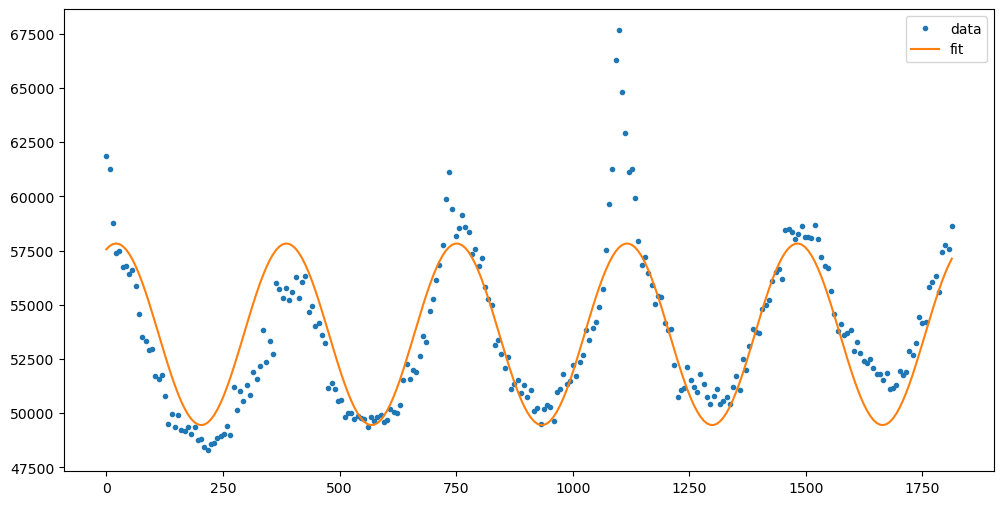

In [58]:
# Decide what students should code here, how much scaffolding should be given.
plt.figure(figsize=(12, 6)) 

def cos_func(x_data, A, B, C, D):
    # REPLACE ... WITH YOUR CODE
    return A * np.cos(B*(x_data - C)) + D


#Here, curve_fit finds the best values for each parameter of our model. Do not change this part of the code.
parameters, _ = curve_fit(cos_func, xdata, ydata, p0=guess) 
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
fit_D = parameters[3]

# REPLACE ... WITH YOUR CODE
fit_cosine = cos_func(xdata, fit_A, fit_B, fit_C, fit_D)

# DO NOT CHANGE THIS CODE
plt.plot(xdata, ydata, '.', label='data')
plt.plot(xdata, fit_cosine, '-', label='fit')

plt.legend()

Nice! Our model looks more accurate to our data now. 

### 1.3 Evaluating goodness of fit

With more parameters, our model looks better fit to the data. However, it's crucial to ask if the chosen model, like a cosine function in this case, truly reflects the underlying patterns of the data. Do we need to make the model more complex or do we have too many parameters and risk overfitting? How can we determine if what we have right now is a good model?

_Use this space to write down any ideas you have_

The approach we will use is evaluating goodness of fit, checking whether our data is likely to be from a specific theoretical distribution we've defined. For example, you may have seen or worked with tests such as chi-square or coefficient of determination (R-squared). Our approach will involve using error bars.






**New information**: The data we are working with is about deaths counts. Each point represents the death count for a given week. No information about the time period will be given yet. Week 0 is some start date and the following values represent the subsequent weeks in the time period. 

For each point, we are 68% confident that the true value was +/- 1000 (i.e. a 68% error bar). To confirm, this is resonable as for any given week, we are staying we are 68% confident that the true count of deaths is plus or minus 1000, as some deaths go unaccounted for, are registered in following weeks, and other factors that influence error. Here's what that looks like.

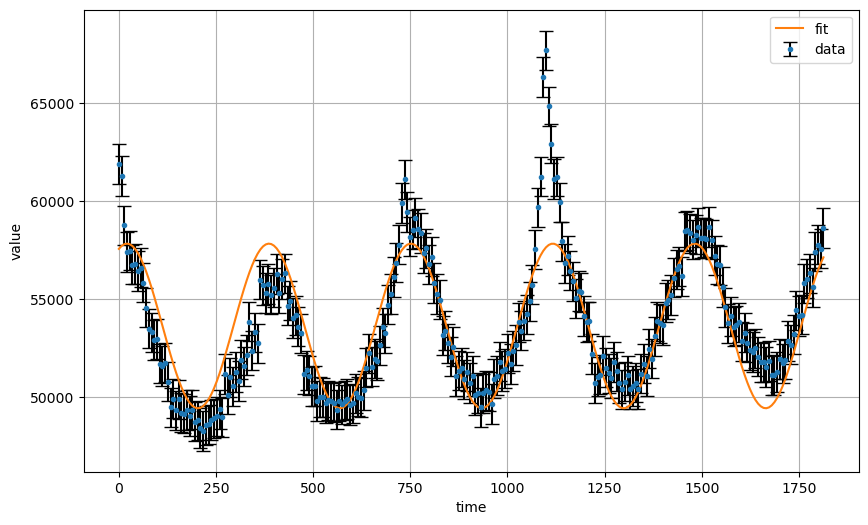

In [59]:
#Just run this cell
plt.figure(figsize=(10, 6))
plt.errorbar(xdata, ydata, yerr=1000, fmt='.', label='data', ecolor='black', capsize=5)
plt.plot(xdata, fit_cosine, '-', label='fit')
plt.legend()

plt.xlabel('time')
plt.ylabel('value')
plt.grid(True)
plt.show()

**Question 1.3.1**: When we create our model, we want it to pass close to about 68% of our data points. Answer why you think so below. In your response, consider what it means about our model if our line doesn't pass through roughly 68% of our data? What if passes through more than 68% of points?

_Replace this text with your answer_

Now, let's actually calculate that percent.

**Question 1.3.2**: Fill in the following code to calculate the percent of error bars our model passes through. Set that value equal to `percentage_passes`. You might find it helpful to use `fit_cosine`, `yerr`, `ydata`, and `xdata` in your answer. 

In [60]:
yerr = 1000 # This is the +/- 1000 given to you. 

# REPLACE ... WITH YOUR CODE
error_bar_passes = ((fit_cosine >= (ydata - yerr)) & (fit_cosine <= (ydata + yerr))).sum()
total_points = len(xdata)
percentage_passes = (error_bar_passes / total_points) * 100

print(f"The fit line passes through {error_bar_passes} error bars out of {total_points} points.")
print(f"Percentage: {percentage_passes:.2f}%")

The fit line passes through 136 error bars out of 260 points.
Percentage: 52.31%


**Question 1.3.3**: Based off the percent of error bars, do you think we should add more complexity? If so, what pattern in the errors do you notice that we could address.

_Replace this text with your answer_

We will add a tilt to our cosine model, such that new model is modelled by a combination of the cosine and linear components. Specifically, _D_ represents the coefficient of the linear term and _E_ represents the y-intercept of the linear term.

$$
f(x)=A\cos(Bx+C)+Dx+E
$$

**Question 1.3.4**: Let's apply what we did in 1.2.3 to our new model with the additional parameter. Then, calculate the new percent of error bars that the fitted model passes through. 

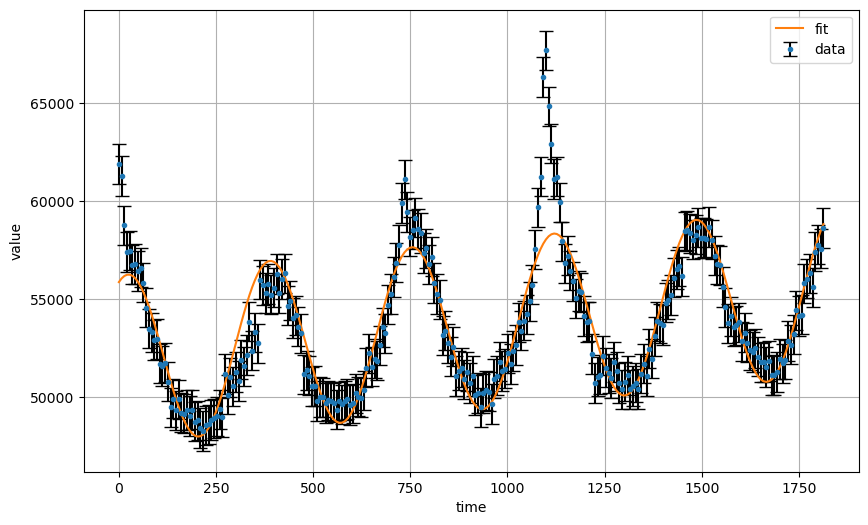

In [61]:
def tilted_cosine(x, A, B, C, D, E):
    # REPLACE ... WITH YOUR CODE
    return A * np.cos(B * x + C) + D * x + E

    
initial_guess = [max(ydata) - min(ydata), np.pi/200, 0, 0, np.mean(ydata)]

parameters, _ = curve_fit(tilted_cosine, xdata, ydata, p0=initial_guess)
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
fit_D = parameters[3]
fit_E = parameters[4]

# REPLACE ... WITH YOUR CODE
fit_data_with_tilt = tilted_cosine(xdata, fit_A, fit_B, fit_C, fit_D, fit_E)

# DO NOT CHANGE 
plt.figure(figsize=(10, 6))
plt.errorbar(xdata, ydata, yerr=1000, fmt='.', label='data', ecolor='black', capsize=5)
plt.plot(xdata, fit_data_with_tilt, '-', label='fit')
plt.legend()
plt.xlabel('time')
plt.ylabel('value')
plt.grid(True)
plt.show()

In [62]:
yerr = 1000 

# REPLACE ... WITH YOUR CODE
error_bar_passes = ((fit_data_with_tilt >= (ydata - yerr)) & (fit_data_with_tilt <= (ydata + yerr))).sum()
total_points = len(xdata)
percentage_passes = (error_bar_passes / total_points) * 100

print(f"The fit line passes through {error_bar_passes} error bars out of {total_points} points.")
print(f"Percentage: {percentage_passes:.2f}%")

The fit line passes through 179 error bars out of 260 points.
Percentage: 68.85%


**Question 1.3.5**: What did adding more complexity to our model do? How do you now feel about calling our current model "a good model"?

_Replace this text with your answer_

## Part 2: Finding a signal

Now that we have a reasonable model, let's investigate what data point deviations are reasonable and which ones are not. 

Let's remind ourselves what the data and the model we built in the previous part looks like. 

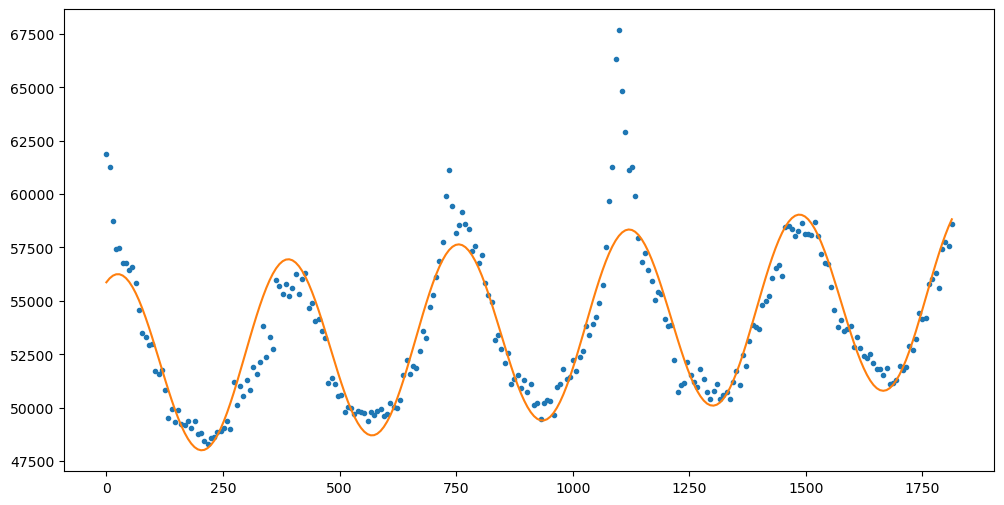

In [63]:
#Just run this cell.
plt.figure(figsize=(12, 6)) 
plt.plot(xdata, ydata, '.', label='data')
plt.plot(xdata, fit_data_with_tilt, '-', label='fit')

### 2.1 Determining a threshold

**Question 2.1.1:** Fill in the following code cell to calucate our model's redisuals and make a residual plot. 

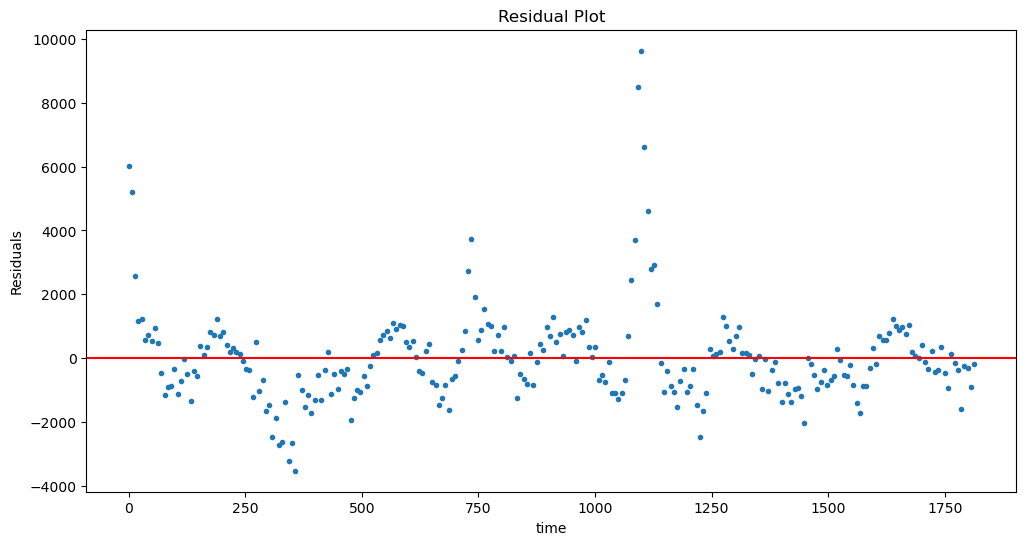

In [64]:
model_residuals = ydata - fit_data_with_tilt #Code to fill in. 
plt.figure(figsize=(12, 6))
plt.plot(xdata, model_residuals, '.')
plt.xlabel('time')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-') 
plt.show()

**Question 2.1.2:** What do you notice about our residual plot? What does this say about the complexity of our model?


_Replace this text with your answer_

To determine the percentage of data points that deviate significantly from the fitted line, we need to establish a threshold. This threshold can be a multiple of the standard deviation (SD) of the residuals. Use the widget below to play around with different threshold values until you find a threshold you feel comfortable with.

In [103]:
# Should we make this hidden?
std_dev_residuals = np.std(model_residuals)

def update_plot(threshold_factor):
    threshold = threshold_factor * std_dev_residuals
    is_outlier = np.abs(model_residuals) > threshold

    plt.figure(figsize=(14, 7))
    plt.scatter(xdata, model_residuals, label='data', color='blue', s=10)
    outlier_points = np.array(xdata)[is_outlier]
    outlier_residuals = np.array(model_residuals)[is_outlier]
    plt.scatter(outlier_points, outlier_residuals, label='outliers', color='red', s=20)
    plt.axhline(0, color='grey', lw=0.8)
    plt.axhline(threshold, color='green', linestyle='--', lw=1, label=f'+{threshold_factor} SD ({threshold:.2f})')
    plt.axhline(-threshold, color='green', linestyle='--', lw=1, label=f'-{threshold_factor} SD ({-threshold:.2f})')
    plt.xlabel('time')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

slider = FloatSlider(value=1, min=0, max=5, step=0.1, description='Threshold SD:', readout_format='.1f')
interact(update_plot, threshold_factor=slider)
plt.show()

interactive(children=(FloatSlider(value=1.0, description='Threshold SD:', max=5.0, readout_format='.1f'), Outp…

**Question 2.1.3:** What threshold did you choose? In your own words, what does this threshold hold represent in the context of the data?

_Replace this text with your answer_

### 2.2 Testing our model

We now have some new data to introduce. This data is chronlogically after the data we have built our model on and chosen our standard deviation cutoff from in the sections above.   

In [77]:
all_xdata = (excessdeaths['Week Ending Date'] - excessdeaths['Week Ending Date'].min()).dt.days
all_ydata = excessdeaths['Number of Deaths'].values 
all_xdata = np.asarray(all_xdata)
all_ydata = np.asarray(all_ydata)

In [78]:
#Just run this cell
# all_xdata, all_ydata = get_all_data()

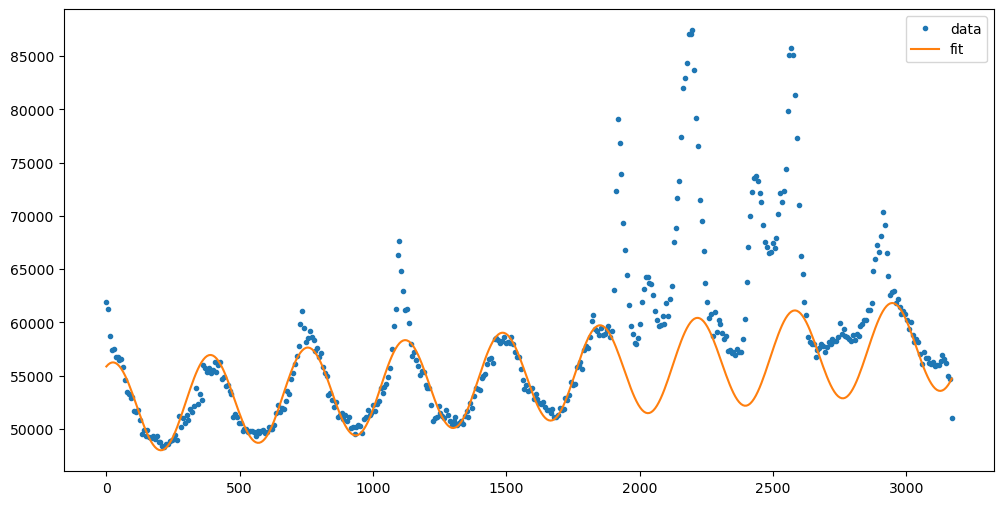

In [79]:
plt.figure(figsize=(12, 6)) 

fit_cosine_all_data = tilted_cosine(all_xdata, fit_A, fit_B, fit_C, fit_D, fit_E)

plt.plot(all_xdata, all_ydata, '.', label='data')
plt.plot(all_xdata, fit_cosine_all_data, '-', label='fit')
plt.legend()

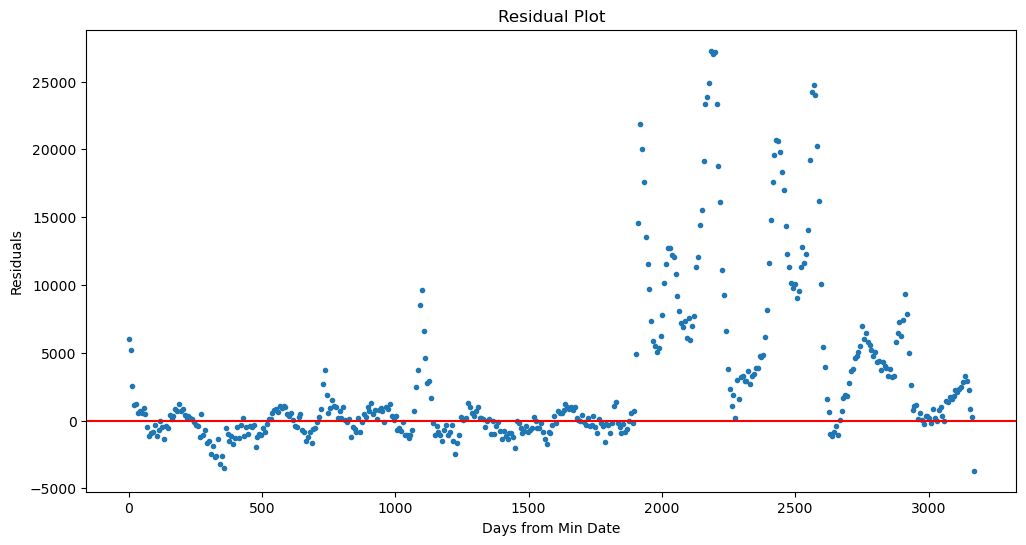

In [84]:
all_data_residuals = all_ydata - fit_cosine_all_data

plt.figure(figsize=(12, 6))
plt.plot(all_xdata, all_data_residuals, '.')
plt.xlabel('Days from Min Date')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-') 
plt.show()

Say we use a threshold of +/3 SD. Let's apply that to all our data now.

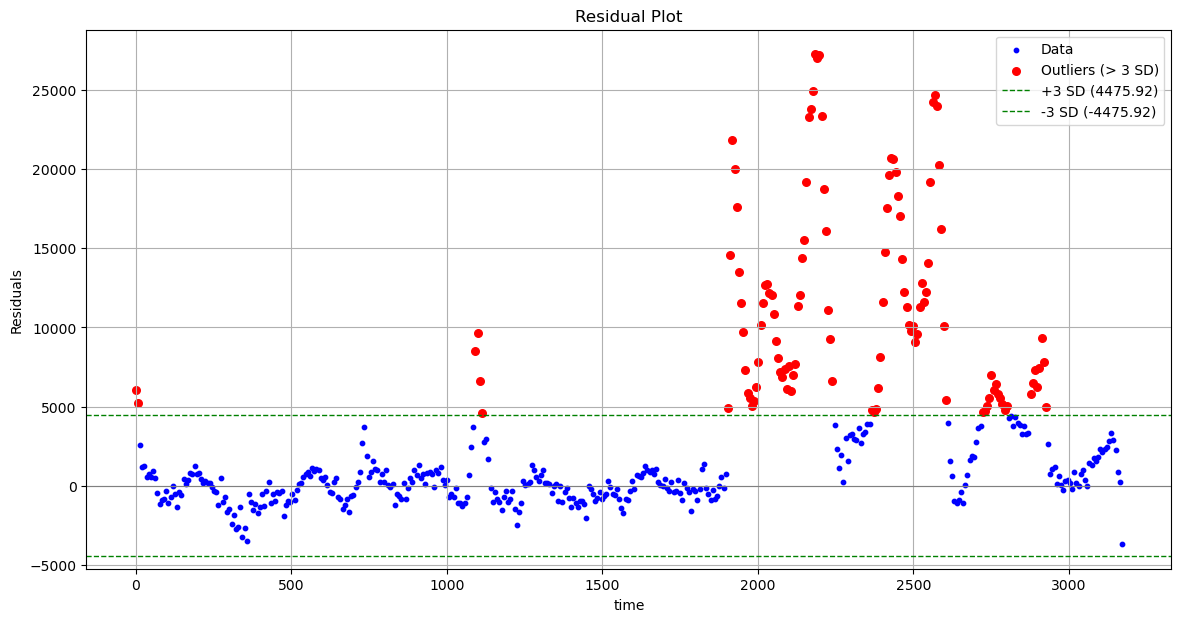

In [97]:
threshold = 3 * std_dev_residuals
is_outlier = np.abs(all_data_residuals) > threshold

plt.figure(figsize=(14, 7))
plt.scatter(all_xdata, all_data_residuals, label='Data', color='blue', s=10)
outlier_points = np.array(all_xdata)[is_outlier]
outlier_residuals = np.array(all_data_residuals)[is_outlier]
plt.scatter(outlier_points, outlier_residuals, label='Outliers (> 3 SD)', color='red', s=30)
plt.axhline(0, color='grey', lw=0.8)
plt.axhline(threshold, color='green', linestyle='--', lw=1, label=f'+3 SD ({threshold:.2f})')
plt.axhline(-threshold, color='green', linestyle='--', lw=1, label=f'-3 SD ({-threshold:.2f})')
plt.xlabel('time')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()

Let's find the first point in the new added data that is above our threshold. 

In [99]:
is_outlier = np.abs(all_data_residuals) > threshold
outlier_x_values = np.array(all_xdata)[is_outlier].tolist()

filtered_outlier_x_values = [x for x in outlier_x_values if x > 1850]
filtered_outlier_x_values[0]

1904

**New Context**: 

In [102]:
initial_date = pd.to_datetime('2015-01-10')
# Calculate the date 1904 days after this initial date
date_after_1904_days = initial_date + pd.Timedelta(days=1904)
date_after_1904_days

Timestamp('2020-03-28 00:00:00')

## Part 3: Hill's Criteria 

##### More thought questions 
- National government ask what else could it be? How do you know this is related to COVID? -- come back to see what Winston had originally suggested in 4/1 meeting (notes lost in deleted notebook ): )
- We've been building a model as if any given year is the same, and that's not true.

Looking back now, ask student to give orders of understanding for each factor we added into the model.

## Part 4: Fermi problem (Bonus)

The physics approach of connecting to unobvious things to find the value of another. Use excess deaths rate and XYZ, to find the population rate. (usually it's just something you search up).

Data 8 Lecture with Chief Data Scientist DJ Patil: https://data.berkeley.edu/news/dj-patil-calls-data-scientists-new-kind-first-responder

Not developed yet, would love any suggesstion/ideas if your still reading this far!